In [2]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
from src.baseline import Baseline
import os; os.chdir('..')

# Electricity Maps - Data Science Challenge
Start by loading the data

In [3]:
# Load data
df = pd.read_csv('data/DK-DK2.csv', index_col=0)
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d %H:00')
df

,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_storage_avg,total_discharge_avg,...,latest_forecasted_wind_y_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
datetime,,,,,,,,,,,,,,,,,,,,,
2014-12-11 23:00,1418338800,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 00:00,1418342400,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 01:00,1418346000,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 02:00,1418349600,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 03:00,1418353200,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26 04:00,1569470400,DK-DK2,156.987260,223.801546,NaN,133.880082,2.370351e+08,388.0,NaN,NaN,...,1.807466,46.21,291.0,1392.0,45.0,590.0,NaN,750.0,0.0,83.0
2019-09-26 05:00,1569474000,DK-DK2,219.305322,221.593838,NaN,218.662122,3.568558e+08,357.0,NaN,NaN,...,2.149387,50.29,249.0,1615.0,498.0,590.0,NaN,493.0,3.0,82.0
2019-09-26 06:00,1569477600,DK-DK2,227.887112,226.866953,NaN,228.262772,3.945843e+08,466.0,NaN,NaN,...,2.543895,51.51,452.0,1714.0,528.0,590.0,NaN,398.0,17.0,77.0


## ARIMA
The arima model is build using the `statsmodels`package.
To improve it I use residual diagnostics and the BIC

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 8760
Model:             ARIMA(1, 1, 0)x(1, 0, 0, 24)   Log Likelihood              -40971.990
Date:                          Thu, 11 Jul 2024   AIC                          81949.980
Time:                                  20:21:43   BIC                          81971.213
Sample:                                       0   HQIC                         81957.215
                                         - 8760                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1141      0.007     16.855      0.000       0.101       0.127
ar.S.L24       0.0946      0.008     11.248      0.

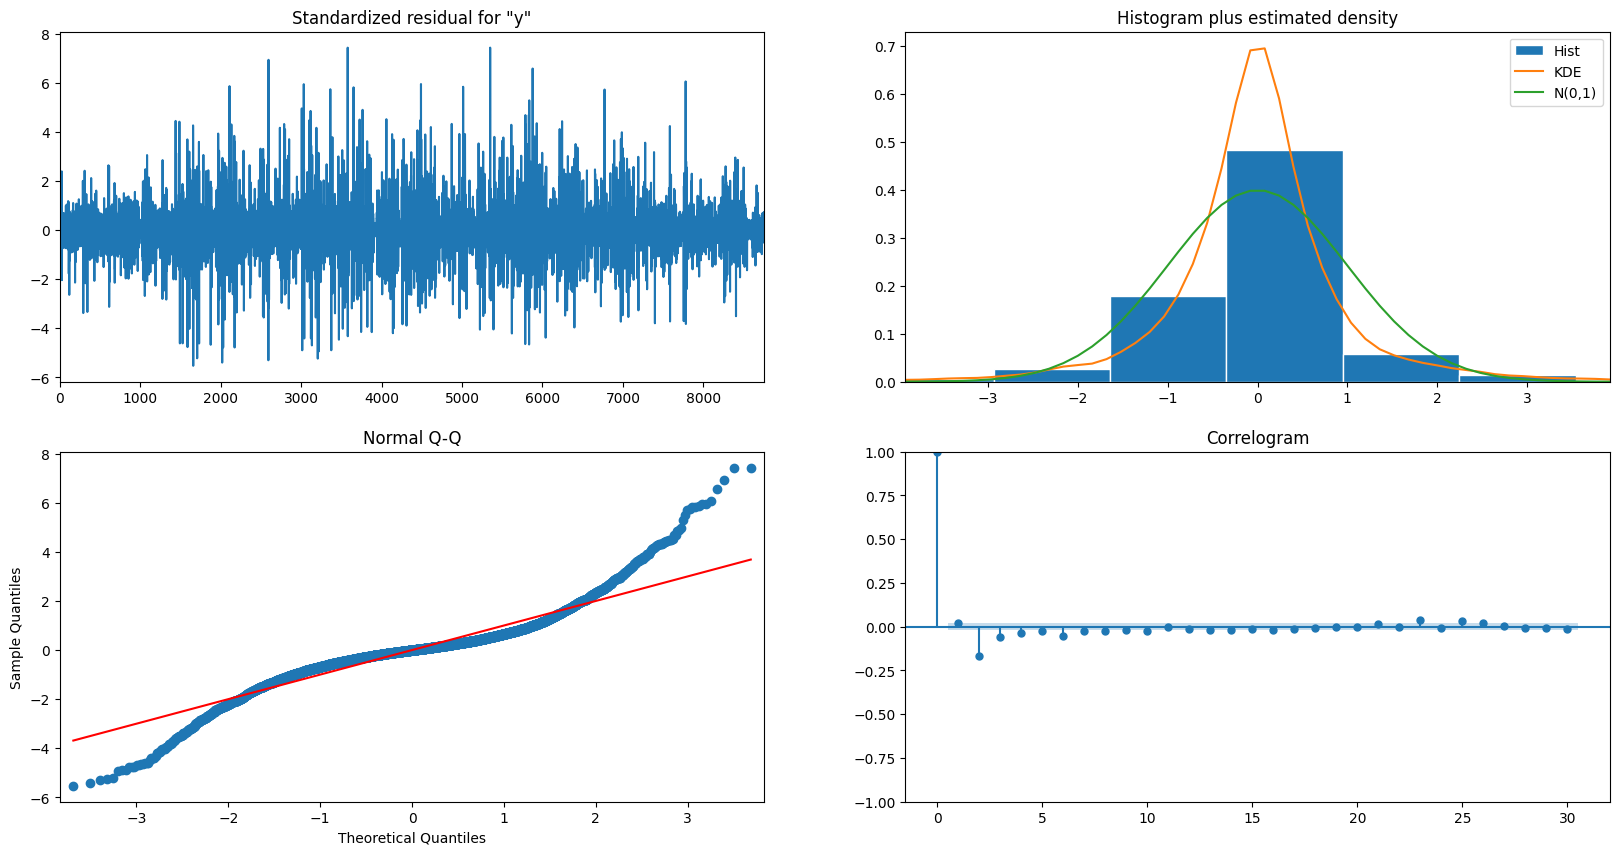

In [4]:
model = Baseline(order = (1,1,0), seasonal_order = (1,0,0,24))
fit = model.fit(df.carbon_intensity_avg['2017':'2018'].values)
fit.plot_diagnostics(figsize=(20,10), lags = 30);
print(fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 8760
Model:             ARIMA(2, 1, 1)x(1, 0, [], 24)   Log Likelihood              -40676.917
Date:                           Thu, 11 Jul 2024   AIC                          81363.834
Time:                                   20:21:49   BIC                          81399.223
Sample:                                        0   HQIC                         81375.892
                                          - 8760                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0313      0.008    136.433      0.000       1.016       1.046
ar.L2         -0.1919      0.007    -27.199

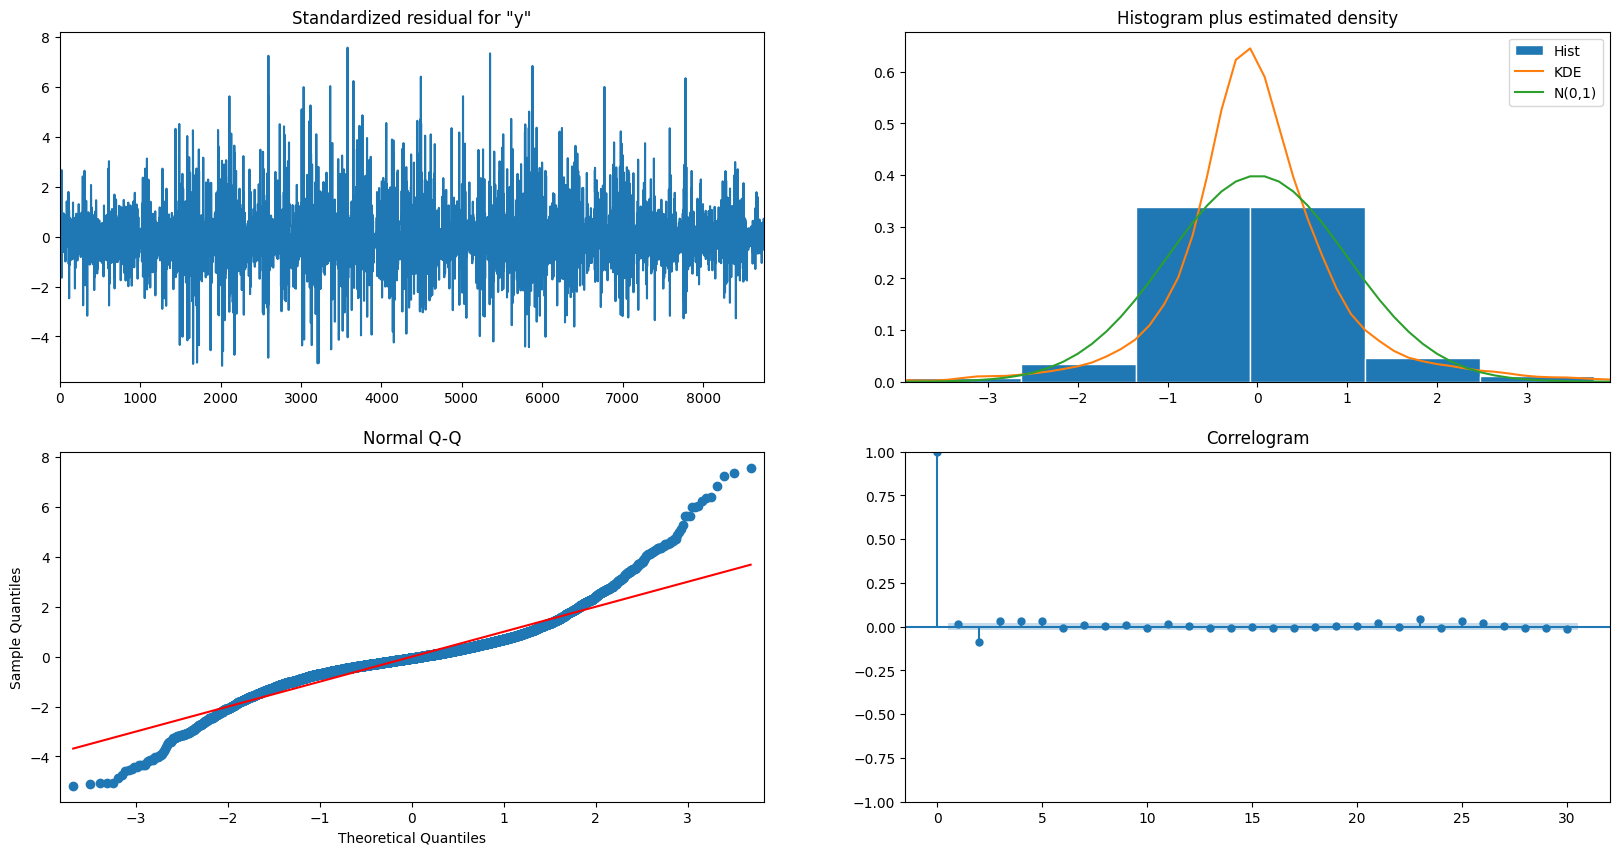

In [5]:
model = Baseline(order = (2,1,1), seasonal_order = (1,0,0,24))
fit = model.fit(df.carbon_intensity_avg['2017':'2018'].values)
fit.plot_diagnostics(figsize=(20,10), lags = 30);
print(fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 8760
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -40538.316
Date:                          Thu, 11 Jul 2024   AIC                          81088.632
Time:                                  20:23:46   BIC                          81131.082
Sample:                                       0   HQIC                         81103.098
                                         - 8760                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0084      0.008    125.020      0.000       0.993       1.024
ar.L2         -0.1863      0.007    -25.670      0.

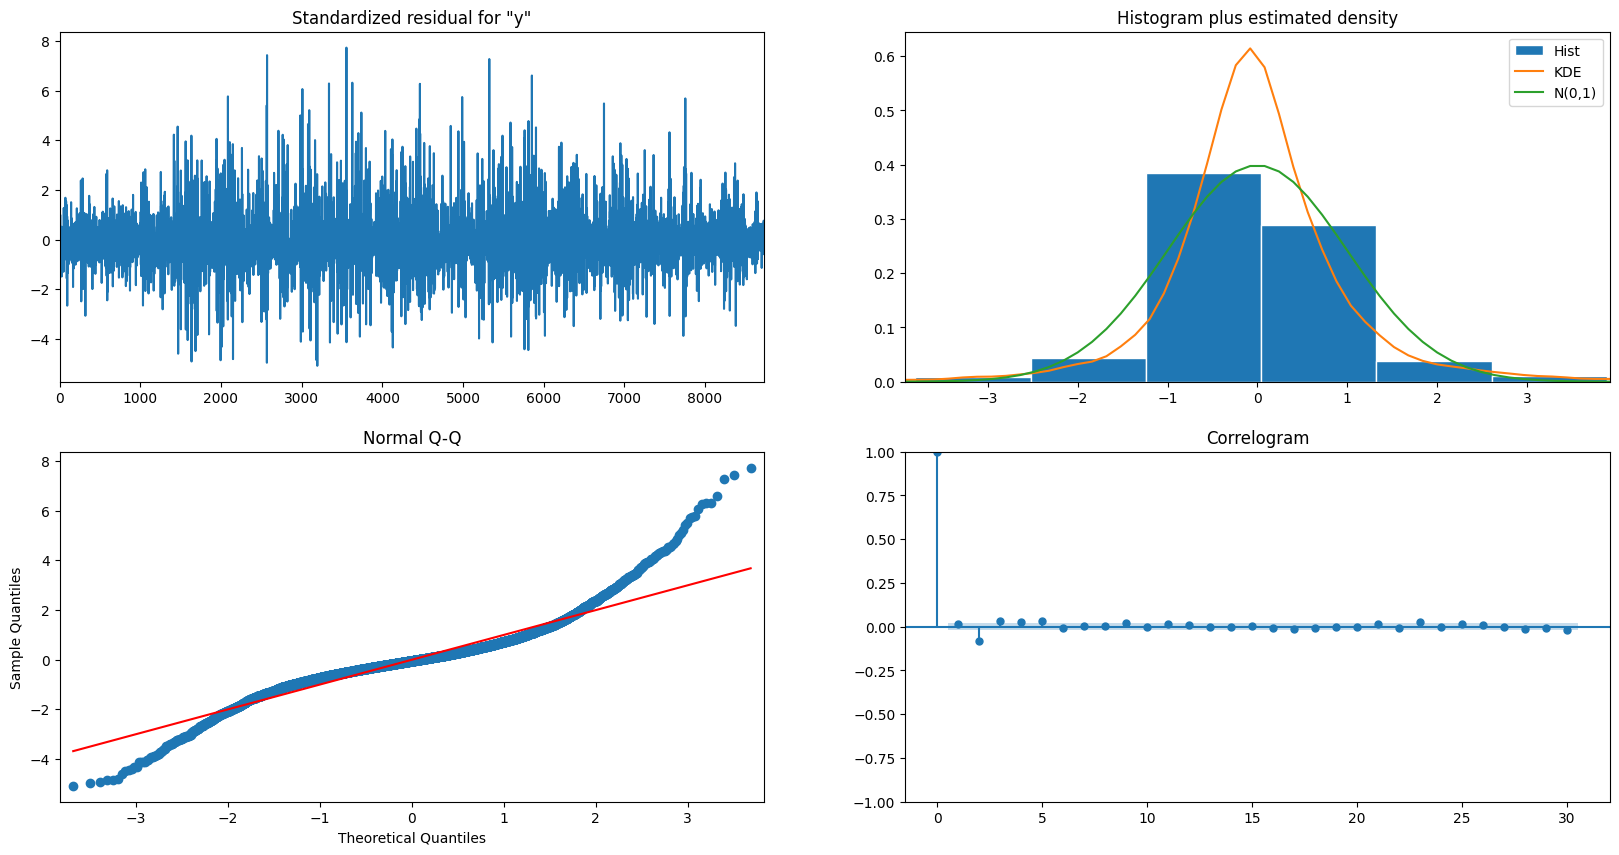

In [6]:
model = Baseline(order = (2,1,1), seasonal_order = (1,1,1,24))
fit = model.fit(df.carbon_intensity_avg['2017':'2018'].values)
fit.plot_diagnostics(figsize=(20,10), lags = 30);
print(fit.summary())

The model is not perfect, as the residual distribution has large tails. ACF looks good and BIC improves.
Not ideal but will work for now.